## importing necessary libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset

In [2]:
df1=pd.read_csv('blackFriday_train.csv')

In [3]:
df1.shape

(550068, 12)

In [4]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


##  Loading test dataset

In [5]:
df2=pd.read_csv('blackFriday_test.csv')

In [6]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df2.shape

(233599, 11)

### Merging both train and test dataset.

In [8]:
df = pd.concat([df1, df2], ignore_index=True, sort=False)

In [9]:
df.shape

(783667, 12)

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [12]:
df.drop(["User_ID"],axis=1,inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [15]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,False,True


In [20]:
df = pd.concat([df,city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [21]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,True,False
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,True,False
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,True,False
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,False,True
783666,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN,True,False


In [22]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [23]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [24]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [26]:
df.Product_Category_1.value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

In [27]:
df.Product_Category_1.mode()  

0    5
Name: Product_Category_1, dtype: int64

In [28]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'},inplace=True)

In [29]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

In [30]:
df['cat1']=df['cat1'].fillna(df['cat1'].mode()[0])

In [31]:
df['cat2']=df['cat2'].fillna(df['cat2'].mode()[0])

In [32]:
df['cat3']=df['cat3'].fillna(df['cat3'].mode()[0])

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,False,True


In [34]:
df.cat2.mode()

0    8.0
Name: cat2, dtype: float64

In [35]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [36]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean())

In [37]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969.0,False,True


In [38]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [39]:
df.drop('City_Category',axis=1,inplace=True)

In [40]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [41]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','')

In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


In [44]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [45]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   cat1                        783667 non-null  int64  
 7   cat2                        783667 non-null  float64
 8   cat3                        783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


## Creating a checkpoint.

In [47]:
df_i=df.copy()

In [48]:
# Dropping the unnecessary field
df_i.drop('Product_ID',axis=1,inplace=True)

In [49]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


## Visualizing Age Vs Purchased.

<Axes: xlabel='Age', ylabel='Purchase'>

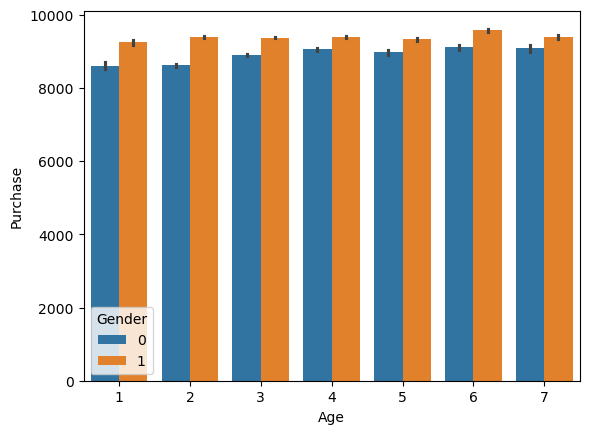

In [50]:
sns.barplot(x='Age',y='Purchase',hue="Gender",data=df_i)

<Axes: xlabel='Occupation', ylabel='Purchase'>

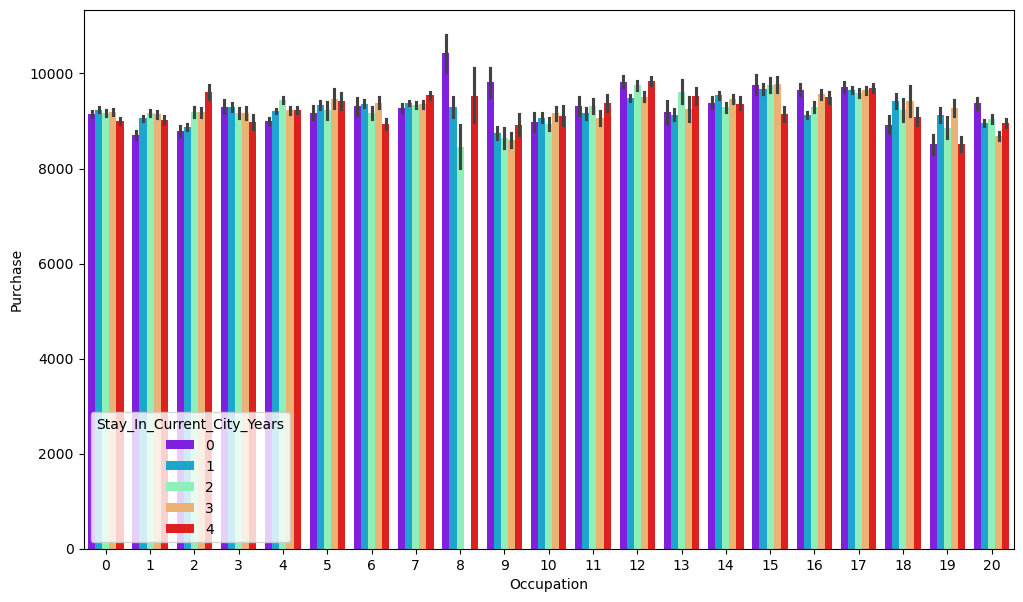

In [51]:
plt.figure(figsize=(12,7))
sns.barplot(x='Occupation',y='Purchase',hue='Stay_In_Current_City_Years',data=df_i,palette='rainbow')

### Visualizing Product_category1 Vs Purchased.

<Axes: xlabel='cat1', ylabel='Purchase'>

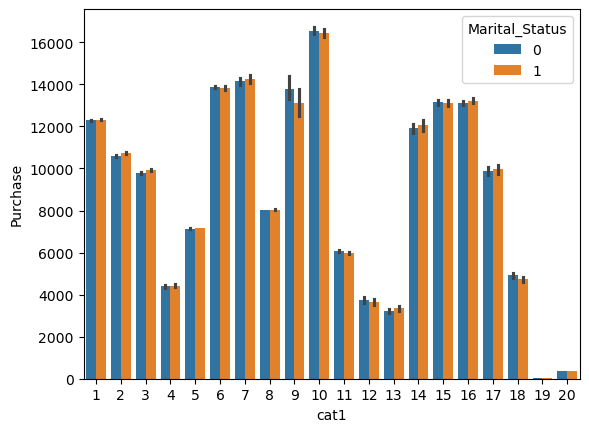

In [52]:
sns.barplot(x='cat1',y='Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

<Axes: xlabel='cat2', ylabel='Purchase'>

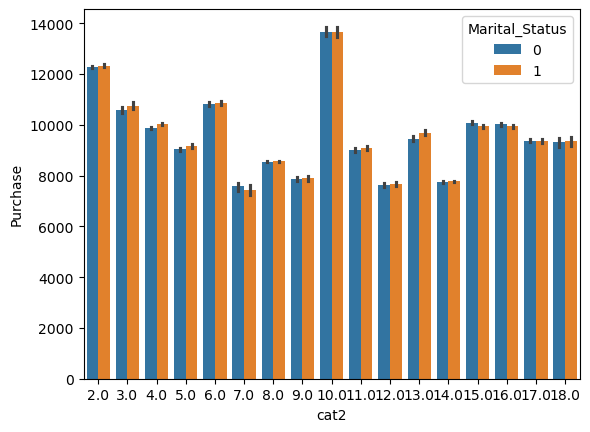

In [53]:
sns.barplot(x='cat2',y='Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

<Axes: xlabel='cat2', ylabel='Purchase'>

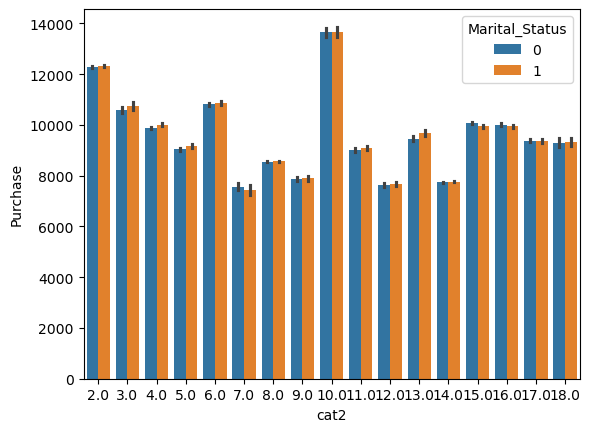

In [54]:
sns.barplot(x='cat2',y='Purchase',hue='Marital_Status',data=df_i)